Import libraries

In [1]:
from RiccardoWorkSpace.Strategy import LessRiskPathStrategy as Strategy
from RiccardoWorkSpace.RiskCost import RiskCostWorstCaseFunction
from RiccardoWorkSpace.AlgorithmLibrary import BFSPathSearch

from JacopoWorkSpace.LibraryJacopo import Map, CreateLevel1, CreateLevel2

from SelormWorkSpace.MovingLibrary import Moving

Choose level get the map and create joystick

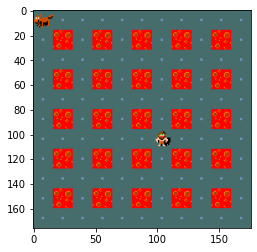

In [2]:
#MapGame, Enviroment = CreateLevel1()
MapGame, Enviroment = CreateLevel2()

Joystick = Moving(Enviroment)

Stategy and successor function

In [3]:
Goal = (5, 34)

def SuccessorFunction(Point):
    
    Result = [(Point[0]-1, Point[1]-1), (Point[0]+1, Point[1]-1),  (Point[0], Point[1]-1),
              (Point[0]-1, Point[1]),   (Point[0]+1, Point[1]),    
              (Point[0]-1, Point[1]+1), (Point[0]+1, Point[1]+1),  (Point[0], Point[1]+1)]
    
    return list(filter(lambda i: MapGame.get_position_symbol(i[0], i[1]) in [".", "@", "d", ">", "<"] or 
                                 MapGame.get_position_symbol(i[0], i[1]) == Goal, Result))

StrategyLogic = Strategy(SuccessorFunction, BFSPathSearch(SuccessorFunction), lambda x, y: RiskCostWorstCaseFunction(SuccessorFunction)(x, y, 1), 2)
StrategyLogic.ActualGoal = Goal  #<--------- Target

Safety First euristhic

Paths calculated: 
4 [(11, 40), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
4 [(11, 40), (11, 39), (10, 38), (9, 37), (8, 36), (7, 35), (6, 34), (5, 34)]
5 [(11, 40), (11, 41), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(11, 40), (12, 40), (11, 39), (10, 38), (9, 37), (8, 36), (7, 35), (6, 34), (5, 34)]
5 [(11, 40), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (6, 34), (5, 34)]
6 [(11, 40), (11, 41), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (6, 34), (5, 34)]
Path chosen 4 [(11, 40), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
(11, 40) --> (10, 40)


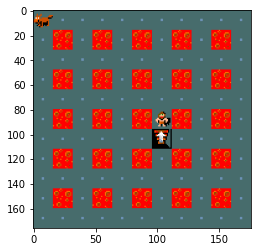

Paths calculated: 
4 [(10, 40), (11, 39), (10, 38), (9, 37), (8, 36), (7, 35), (6, 34), (5, 34)]
4 [(10, 40), (9, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (6, 38), (5, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (6, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (6, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (7, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (9, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (11, 41), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 40), (9, 39), (8, 38), (7, 37), (6, 36), (

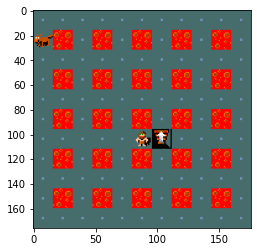

Paths calculated: 
4 [(11, 39), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(11, 39), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (6, 34), (5, 34)]
5 [(11, 39), (11, 38), (11, 37), (10, 36), (9, 35), (8, 34), (7, 34), (6, 34), (5, 34)]
5 [(11, 39), (11, 38), (11, 37), (10, 36), (9, 35), (8, 34), (7, 35), (6, 34), (5, 34)]
5 [(11, 39), (11, 38), (11, 37), (10, 36), (9, 35), (8, 36), (7, 35), (6, 34), (5, 34)]
5 [(11, 39), (11, 38), (11, 37), (10, 36), (9, 36), (8, 36), (7, 35), (6, 34), (5, 34)]
5 [(11, 39), (11, 38), (11, 37), (10, 36), (9, 37), (8, 36), (7, 35), (6, 34), (5, 34)]
5 [(11, 39), (11, 38), (11, 37), (10, 38), (9, 37), (8, 36), (7, 35), (6, 34), (5, 34)]
5 [(11, 39), (12, 38), (11, 37), (10, 36), (9, 35), (8, 34), (7, 34), (6, 34), (5, 34)]
5 [(11, 39), (12, 38), (11, 37), (10, 36), (9, 35), (8, 34), (7, 35), (6, 34), (5, 34)]
5 [(11, 39), (12, 38), (11, 37), (10, 36), (9, 35), (8, 36), (7, 35), (6, 34), (5, 34)]
5 [(11, 39), (12, 38), (11

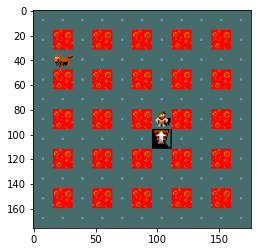

Paths calculated: 
5 [(10, 40), (9, 41), (8, 40), (7, 39), (6, 38), (5, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (6, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (6, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (7, 39), (7, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (8, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (9, 41), (9, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (11, 41), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
5 [(10, 40), (11, 40), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
6 [(10, 40), (9, 41), (8, 40), (7, 39), (6, 38), (5, 37), (6, 36), (5, 35), (6, 34), (5, 34)]
6 [(10, 40), (11, 41), (10, 40),

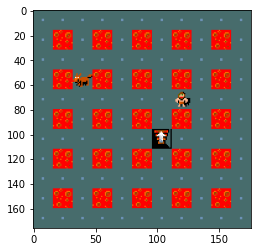

Paths calculated: 
6 [(9, 41), (9, 42), (9, 41), (8, 40), (7, 39), (6, 38), (5, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (9, 42), (9, 41), (8, 40), (7, 39), (6, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
6 [(9, 41), (9, 42), (9, 41), (8, 40), (7, 39), (6, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (9, 42), (9, 41), (8, 40), (7, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (9, 42), (9, 41), (8, 40), (7, 39), (7, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (9, 42), (9, 41), (8, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (9, 42), (9, 41), (10, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (9, 42), (9, 41), (9, 40), (9, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (8, 42), (7, 41), (6, 40), (5, 39), (6, 38), (5, 37), (6, 36), (5, 35), (5, 34)]
6 [(9, 41), (8, 42), (7, 41), (6, 40), (5, 39), (6, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
6 [(9, 41), (8, 42), (7, 41), (6, 40), (5, 39), (6

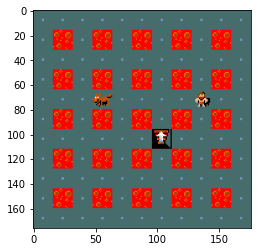

Paths calculated: 
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (5, 39), (6, 38), (5, 37), (6, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (5, 39), (6, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (5, 39), (6, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (5, 39), (5, 38), (5, 37), (6, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (5, 39), (5, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (7, 39), (6, 38), (5, 37), (6, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (7, 39), (6, 38), (5, 37), (5, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (7, 39), (6, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (7, 39), (8, 38), (7, 37), (6, 36), (5, 35), (5, 34)]
7 [(9, 42), (9, 43), (8, 42), (7, 41), (6, 40), (7, 39), (7, 38

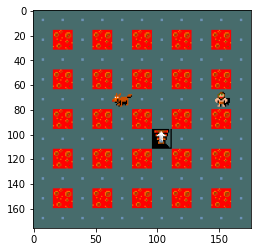

In [4]:
while(True):
    
    CharacterPosition = MapGame.get_player_location()
    MonsterPositions = MapGame.get_monsters_location()

    if CharacterPosition==StrategyLogic.ActualGoal:
        
        print("Target reached!")
        break

    else:
        
        NextStep = StrategyLogic.Calculate(CharacterPosition, MonsterPositions)
        
        if(StrategyLogic.GetActualPath().GetRiskCost() == 0):
            for i, Step in enumerate(StrategyLogic.GetActualPath()[1:]):
                
                print("Path chosen", StrategyLogic.GetActualPath())
                print(f"{CharacterPosition} --> {NextStep}")
                
                NewState = Joystick.Move(CharacterPosition, NextStep)
                MapGame = Map(NewState)
            
                MapGame.view_map()
        
            break            

        print("Path chosen", StrategyLogic.GetActualPath())
        print(f"{CharacterPosition} --> {NextStep}")
        
        NewState = Joystick.Move(CharacterPosition, NextStep)
        MapGame = Map(NewState)
    
        MapGame.view_map()
